In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import json
import scipy.stats as stats
import math

import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms

import vizualizacia_funkcie as visual
import preprocessing_pipeline as prep_pip



# Predspracovanie validacneho datasetu a opis pripadnych zmien

In [2]:
df1 = pd.read_csv("./data/personal_train.csv", index_col=0)
df2 = pd.read_csv("./data/other_train.csv", index_col=0)

X,y = prep_pip.one_proper_df(df1, df2)

C:\Users\makoh\IAU\git_projekt\IAU\preprocessing_pipeline.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_dataset.iloc[0][attr] = not_null.values[0]


In [3]:
PIP = prep_pip.get_preprocessing_pipeline()

In [4]:
preprocessed_train_data = PIP.fit_predict(X,y)

In [5]:
print(preprocessed_train_data[0].shape)
print(preprocessed_train_data[1].shape)

(3254, 33)
(3254,)


In [6]:
preprocessed_train_data[0].columns

Index(['age', 'mean_oxygen', 'std_oxygen', 'kurtosis_oxygen',
       'skewness_oxygen', 'mean_glucose', 'std_glucose', 'kurtosis_glucose',
       'skewness_glucose', 'sex_0', 'sex_1', 'marital-status_0',
       'marital-status_1', 'marital-status_2', 'marital-status_3',
       'relationship_0', 'relationship_1', 'relationship_2', 'relationship_3',
       'occupation_0', 'occupation_1', 'occupation_2', 'occupation_3',
       'occupation_4', 'occupation_5', 'occupation_6', 'occupation_7',
       'occupation_8', 'workclass_0', 'workclass_1', 'education',
       'hours-per-week-cat', 'income'],
      dtype='object')

# Pri praci s validacnym datasetom sa nepouziva fit_predict ale iba predict

In [7]:
df1 = pd.read_csv("./data/personal_valid.csv", index_col=0)
df2 = pd.read_csv("./data/other_valid.csv", index_col=0)

In [8]:
preprocessed_train_data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 3254 non-null   float64
 1   mean_oxygen         3254 non-null   float64
 2   std_oxygen          3254 non-null   float64
 3   kurtosis_oxygen     3254 non-null   float64
 4   skewness_oxygen     3254 non-null   float64
 5   mean_glucose        3254 non-null   float64
 6   std_glucose         3254 non-null   float64
 7   kurtosis_glucose    3254 non-null   float64
 8   skewness_glucose    3254 non-null   float64
 9   sex_0               3254 non-null   float64
 10  sex_1               3254 non-null   float64
 11  marital-status_0    3254 non-null   float64
 12  marital-status_1    3254 non-null   float64
 13  marital-status_2    3254 non-null   float64
 14  marital-status_3    3254 non-null   float64
 15  relationship_0      3254 non-null   float64
 16  relati

# Manualne vytvorenie a vyhodnotenie rozhodovacich pravidiel pre klasifikaciu

In [9]:
medical_data = preprocessed_train_data[0][['kurtosis_glucose', 'skewness_glucose', 'mean_glucose', 'std_glucose', 
                                           'kurtosis_oxygen','skewness_oxygen', 'mean_oxygen', 'std_oxygen']]

In [10]:
medical_data['class']=pd.Series(preprocessed_train_data[1])

C:\Users\makoh\anaconda3\envs\IAU\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


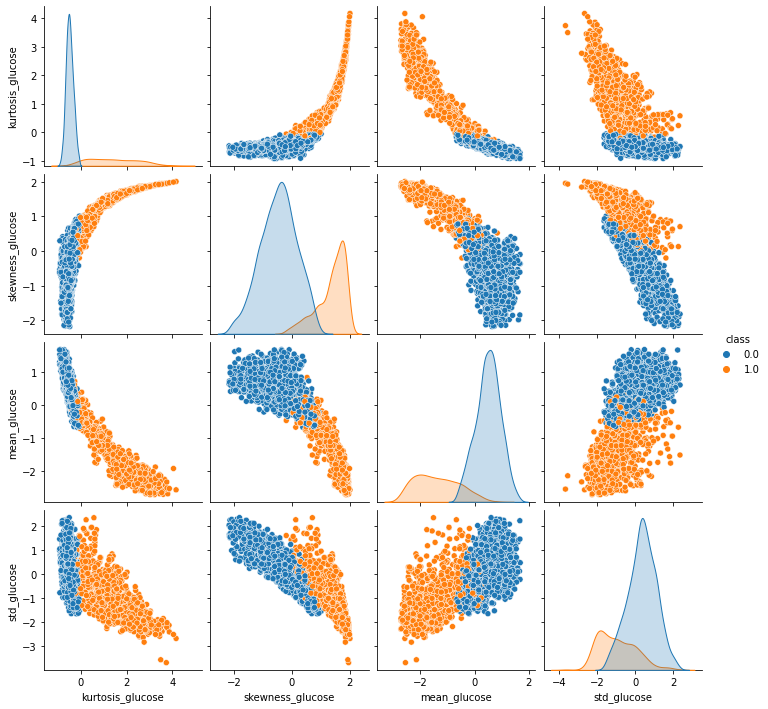

In [11]:
sns.pairplot(medical_data[['kurtosis_glucose', 'skewness_glucose', 'mean_glucose', 'std_glucose','class']], hue = 'class')

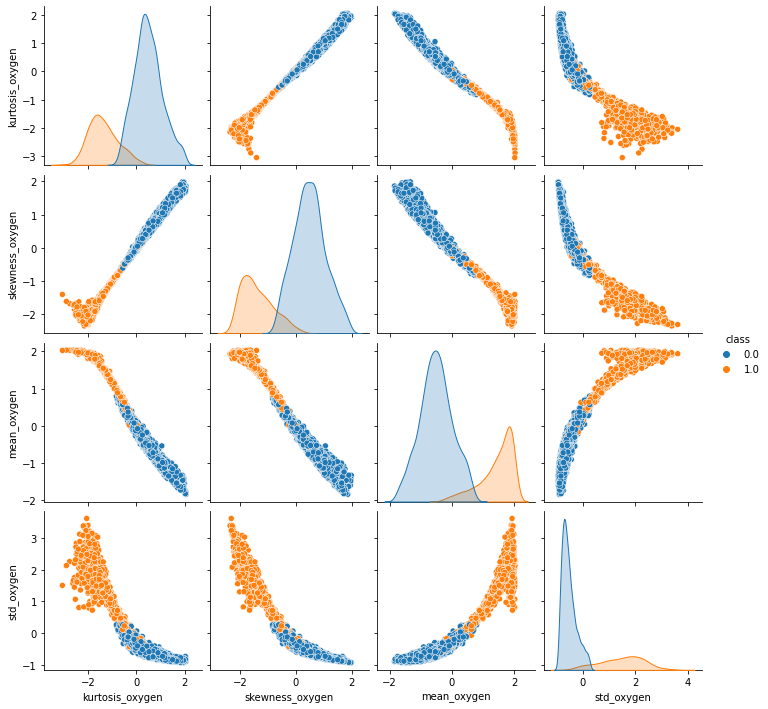

In [12]:
sns.pairplot(medical_data[['kurtosis_oxygen','skewness_oxygen', 'mean_oxygen', 'std_oxygen', 'class']], hue = 'class')

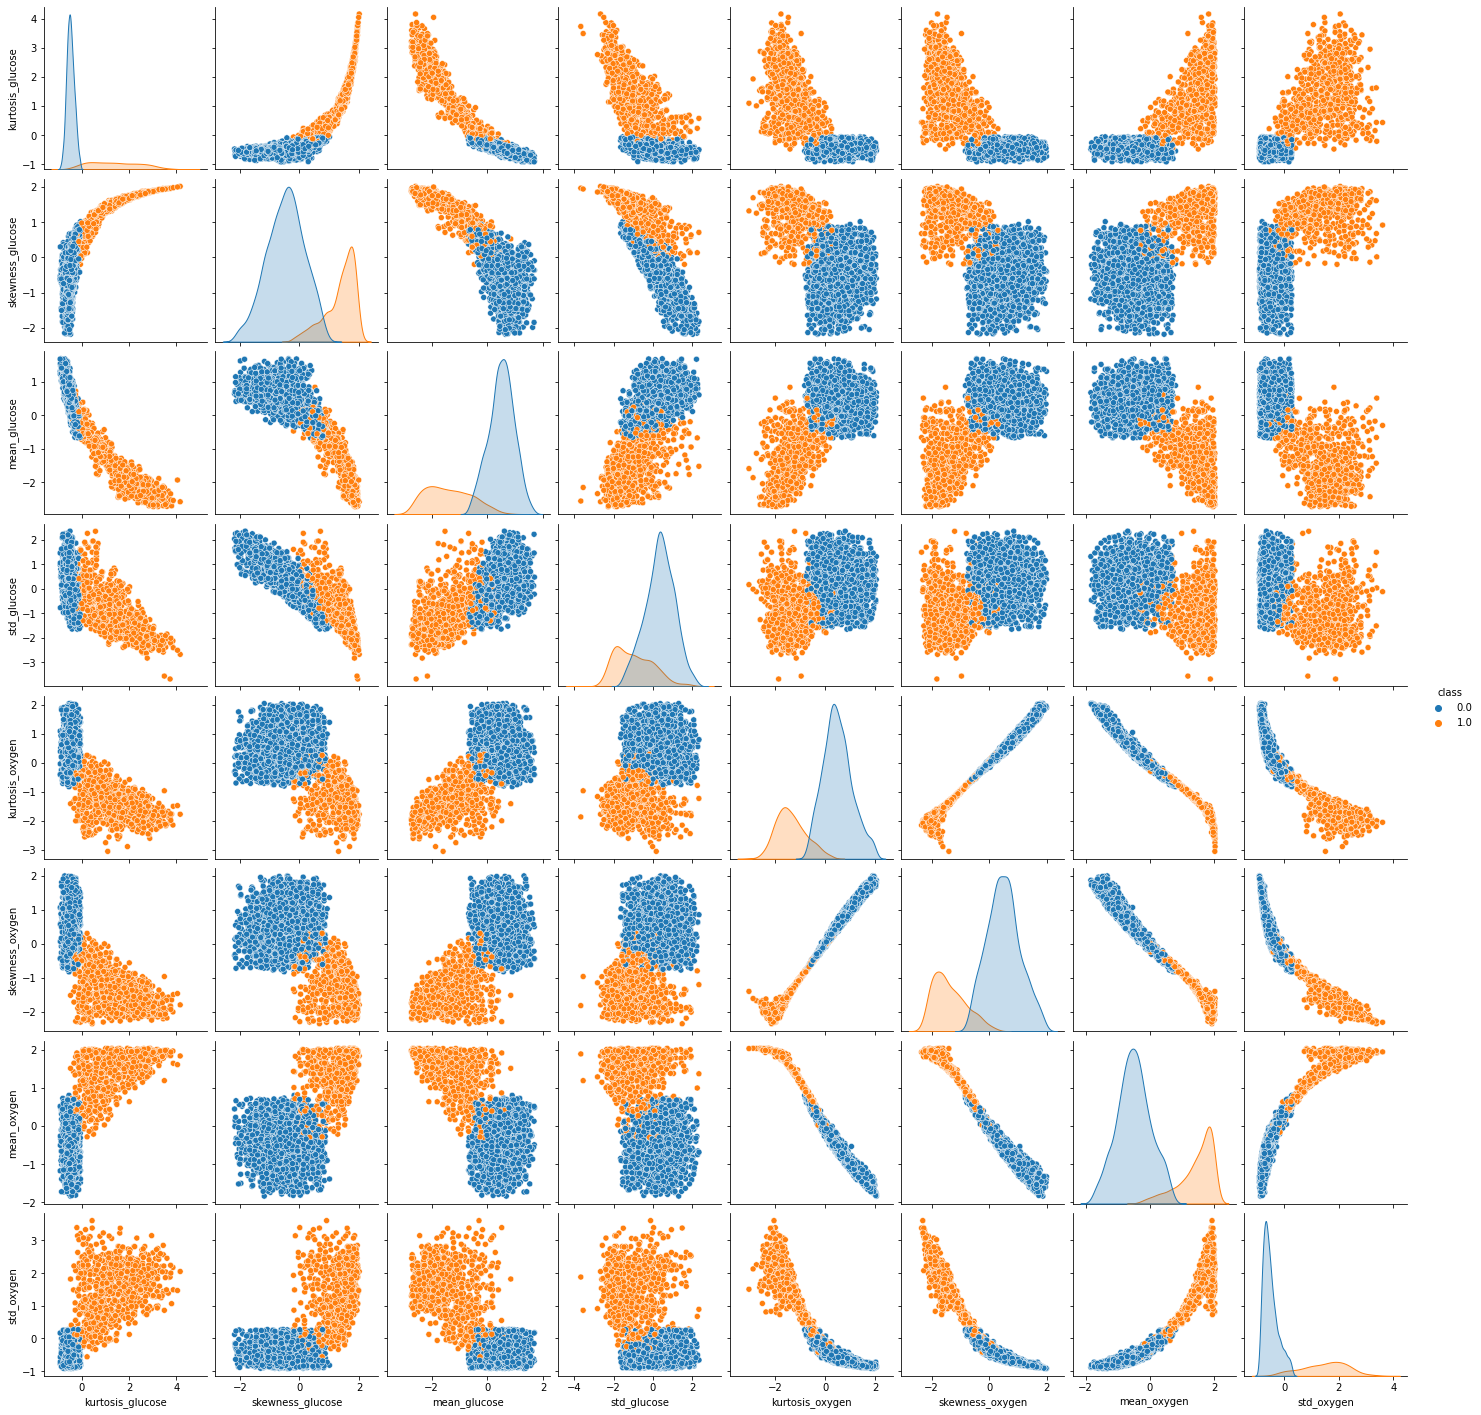

In [13]:
sns.pairplot(medical_data, hue = 'class')

Korelacia medzi nasim atributom a y: 0.8332636111101277


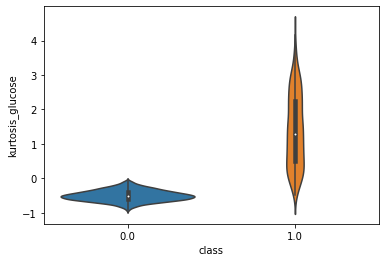

C:\Users\makoh\anaconda3\envs\IAU\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\makoh\anaconda3\envs\IAU\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


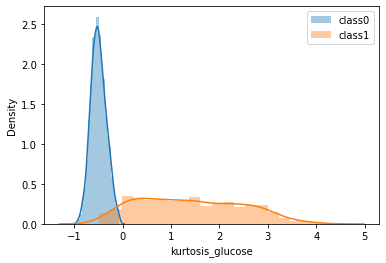

In [14]:
visual.univariate_num_to_class(medical_data, "kurtosis_glucose", show_regplot=False)

Korelacia medzi nasim atributom a y: 0.877937984221098


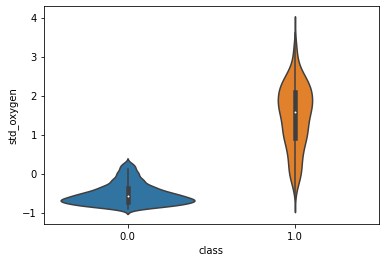

C:\Users\makoh\anaconda3\envs\IAU\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\makoh\anaconda3\envs\IAU\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


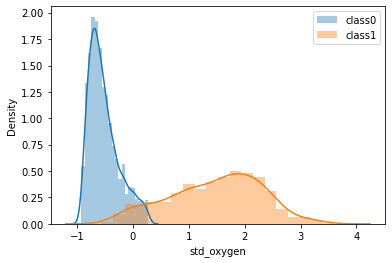

In [15]:
visual.univariate_num_to_class(medical_data, "std_oxygen", show_regplot=False)

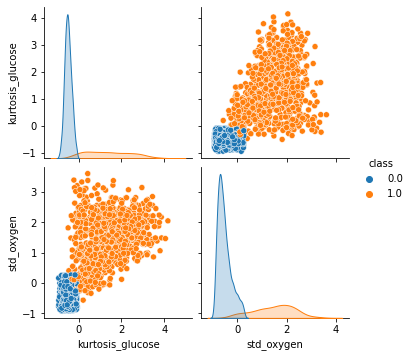

In [16]:
sns.pairplot(medical_data[['kurtosis_glucose', 'std_oxygen', 'class']], hue = 'class')

In [17]:
medical_data

,kurtosis_glucose,skewness_glucose,mean_glucose,std_glucose,kurtosis_oxygen,skewness_oxygen,mean_oxygen,std_oxygen,class
0,-0.589588,-0.351147,0.605205,-0.380250,0.764125,0.725318,-0.970829,-0.686117,0.0
1,-0.540657,-1.337825,0.579292,1.298640,1.157517,1.016598,-1.169635,-0.668252,0.0
2,-0.572961,0.588530,0.166750,-1.209121,1.526660,1.718140,-1.084647,-0.899623,0.0
3,-0.674814,-0.850382,1.046178,1.393176,1.599282,1.589144,-1.329568,-0.861695,0.0
4,-0.525464,-0.844457,0.613355,1.094966,0.129948,0.034783,-0.159589,-0.176830,0.0
...,...,...,...,...,...,...,...,...,...
3249,-0.634195,-0.597192,0.703377,0.751195,0.691051,0.810227,-0.725181,-0.737588,0.0
3250,-0.343758,0.544180,-0.019753,-1.224042,0.250342,0.276836,-0.247963,-0.509437,0.0
3251,-0.530779,-0.658326,0.904298,-0.183360,1.082239,1.054666,-0.985856,-0.720411,0.0
3252,1.724890,1.645331,-1.482719,-1.471305,-1.711457,-1.918059,1.792960,2.798961,1.0


# Natrenovanie a vyhodnotenie klasifikatora s vyuzitim rozhodovacich stromov

In [32]:
preprocessed_train_data[0]['class']=pd.Series(preprocessed_train_data[1])

In [33]:
y = preprocessed_train_data[0]['class']
x = preprocessed_train_data[0].drop(['class'], axis=1)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state = 101, stratify = y, test_size = 0.25)

In [36]:
y_train.value_counts(normalize = True)

0.0    0.738934
1.0    0.261066
Name: class, dtype: float64

In [37]:
y_valid.value_counts(normalize = True)

0.0    0.738329
1.0    0.261671
Name: class, dtype: float64

In [38]:
x_train.shape, y_train.shape

((2440, 33), (2440,))

In [39]:
x_valid.shape, y_valid.shape

((814, 33), (814,))

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
dt_model = DecisionTreeClassifier(random_state = 10)

In [43]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [44]:
dt_model.score(x_train, y_train)

1.0

In [45]:
dt_model.score(x_valid, y_valid)

0.9815724815724816

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth = depth, random_state = 10)
    dt_model.fit(x_train, y_train)
    train_accuracy.append(dt_model.score(x_train, y_train))
    validation_accuracy.append(dt_model.score(x_valid, y_valid))

In [48]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.983607,0.982801
1,2,0.993033,0.987715
2,3,0.993033,0.987715
3,4,0.993033,0.987715
4,5,0.994262,0.981572


No handles with labels found to put in legend.


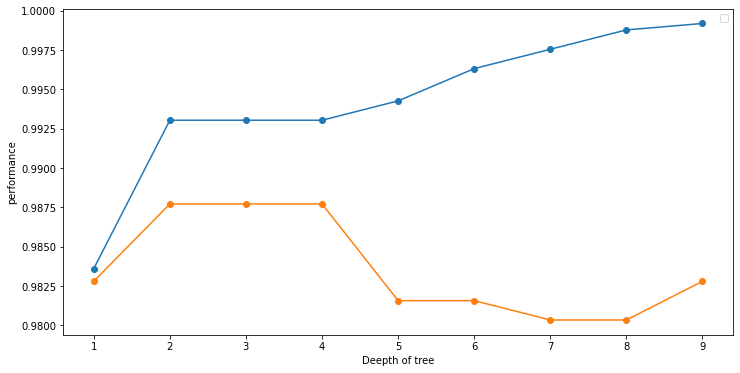

In [49]:
plt.figure(figsize = (12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Deepth of tree')
plt.ylabel('performance')
plt.legend()

In [50]:
dt_model = DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = 25, random_state =10)

In [51]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [52]:
dt_model.score(x_train, y_train)

0.9987704918032787

In [53]:
dt_model.score(x_valid, y_valid)

0.9828009828009828

In [54]:
from sklearn import tree

In [55]:
!pip install graphviz

In [56]:
decision_tree = tree.export_graphviz(dt_model, out_file = 'tree.dot', feature_names = x_train.columns, max_depth=4,filled=True)

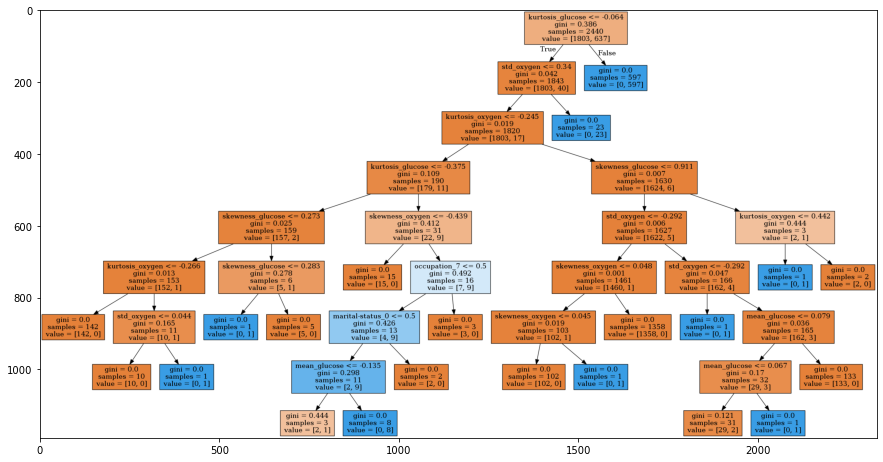

In [57]:
image = plt.imread('tree.png')
plt.figure(figsize = (15,15))
plt.imshow(image)

# Optimalizacia hyperparametrov

# Vyhodnotenie vplyvu zvolenej strategie riesenia na spravnost klasifikacie